In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train_ctrUa4K.csv')
df.head()
df_test = pd.read_csv('test_lAUu6dG.csv')
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [3]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
df['Loan_Status'].value_counts()  # Frequency table gives count of each category in the variable

Y    422
N    192
Name: Loan_Status, dtype: int64

## Dependent Variable (Target)

<AxesSubplot:>

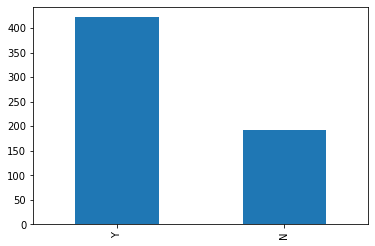

In [5]:
df['Loan_Status'].value_counts().plot(kind='bar')

## Independent Variable (Categorical)

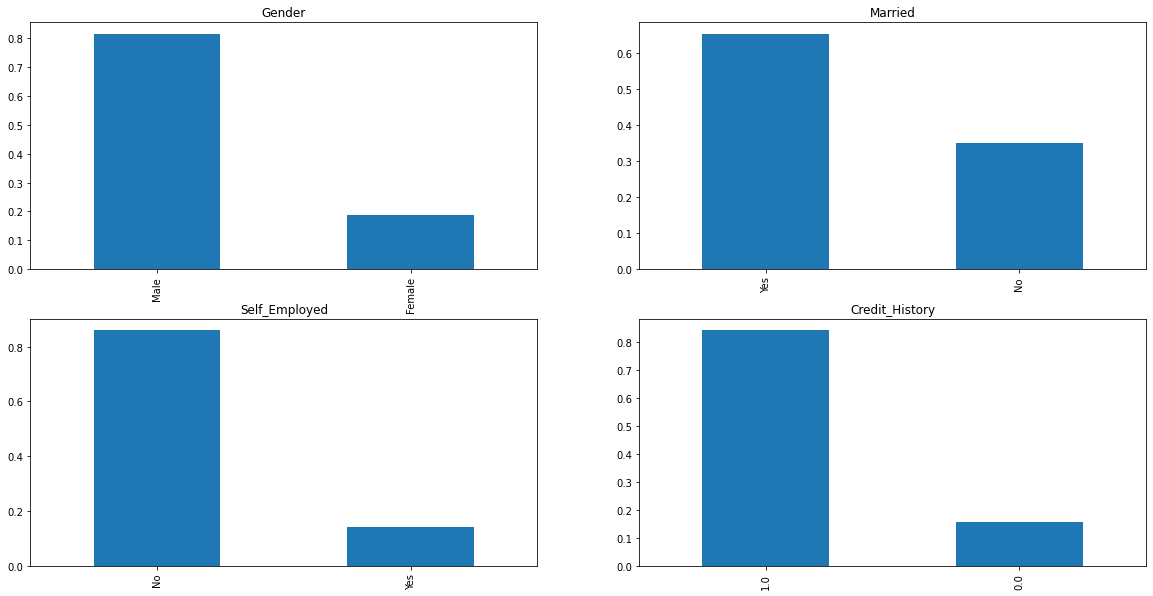

In [6]:
plt.figure(1) 
plt.subplot(221)
df['Gender'].value_counts(normalize='True').plot(kind='bar',figsize=(20,10),title='Gender')
plt.subplot(222)
df['Married'].value_counts(normalize='True').plot(kind='bar',title='Married')
plt.subplot(223)
df['Self_Employed'].value_counts(normalize='True').plot(kind='bar',title='Self_Employed')
plt.subplot(224)
df['Credit_History'].value_counts(normalize='True').plot(kind='bar',title='Credit_History')
plt.show()

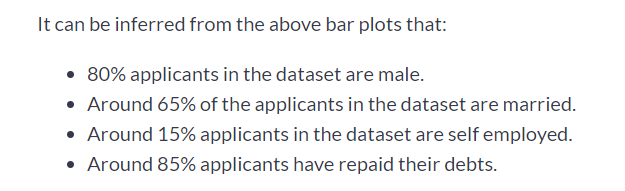


## Independent Variable (Ordinal)

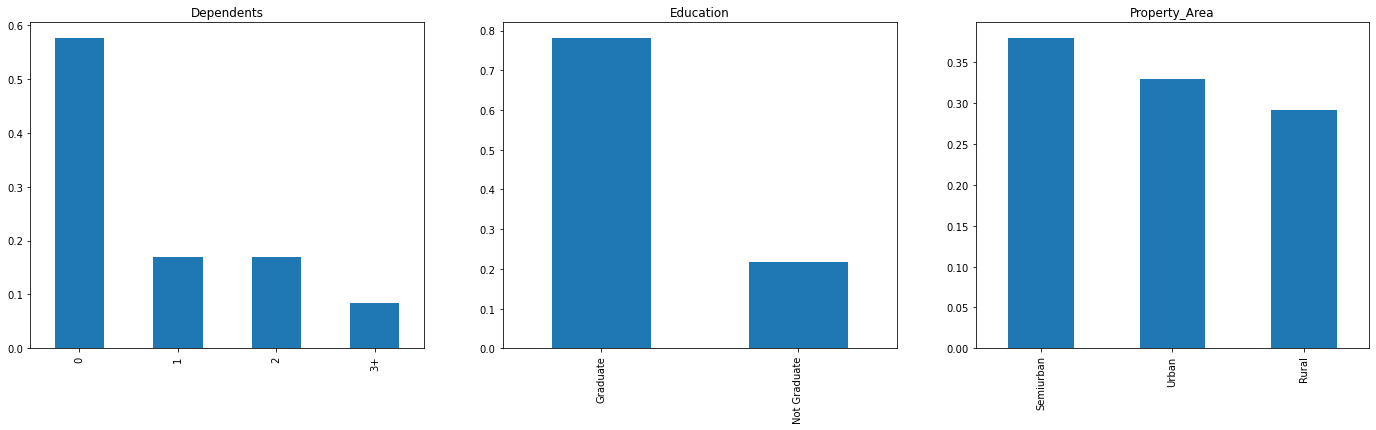

In [7]:
plt.figure(1)
plt.subplot(131)
df['Dependents'].value_counts(normalize='True').plot(kind='bar',figsize=(24,6),title='Dependents')
plt.subplot(132)
df['Education'].value_counts(normalize='True').plot(kind='bar',title='Education')
plt.subplot(133)
df['Property_Area'].value_counts(normalize='True').plot(kind='bar', title='Property_Area')
plt.show()

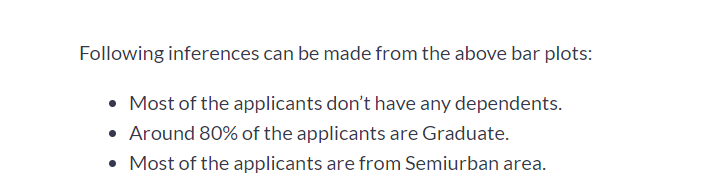

## Independent Variable (Numerical)

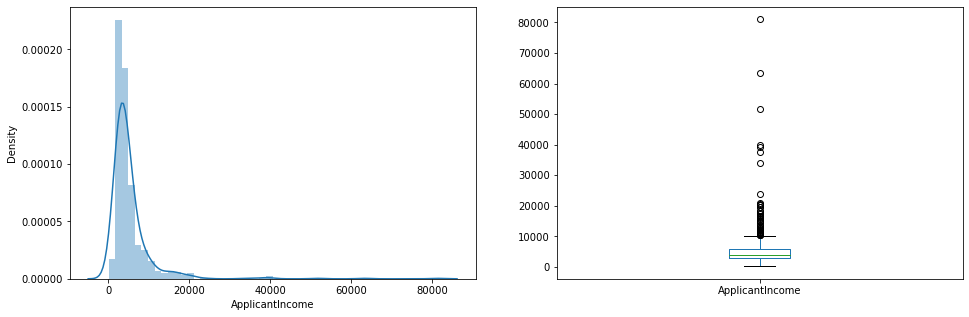

In [8]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome'])
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

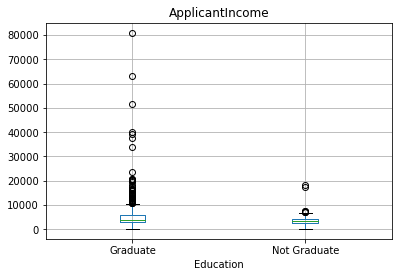

In [9]:
df.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")

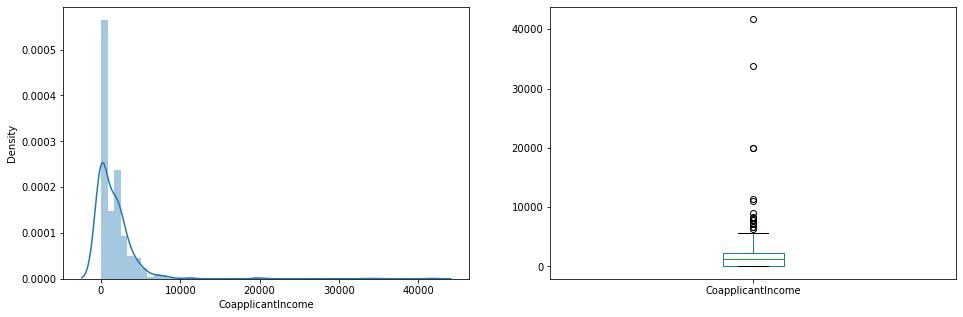

In [10]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome'])
plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

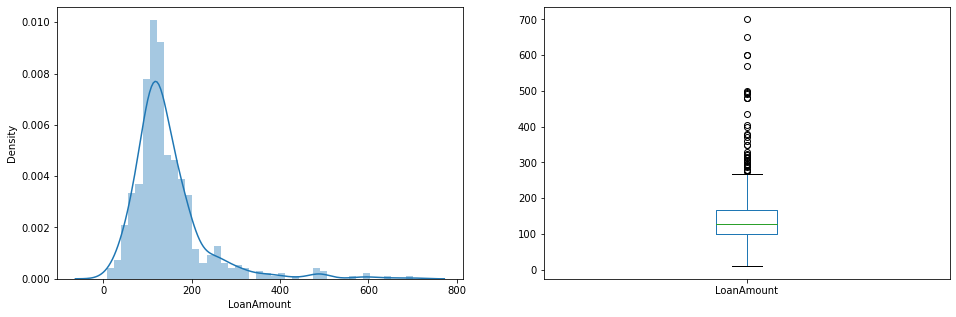

In [11]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['LoanAmount'])
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:xlabel='Gender'>

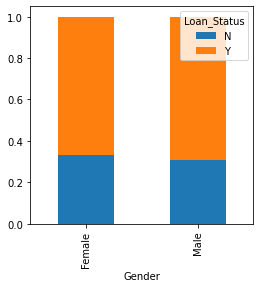

In [12]:
Gender = pd.crosstab(df['Gender'], df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar", stacked="True", figsize=(4,4))

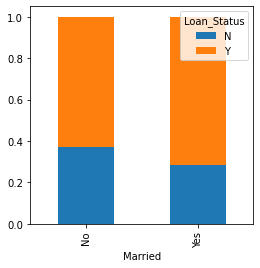

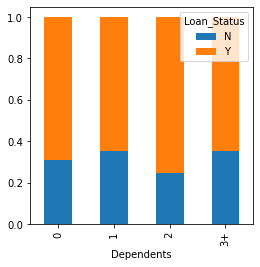

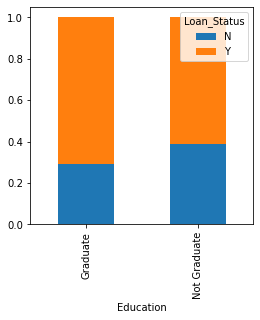

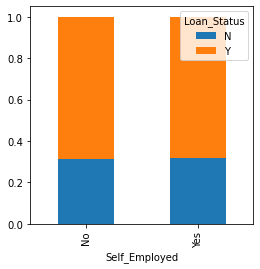

In [13]:
Married = pd.crosstab(df['Married'], df['Loan_Status'])
Dependents = pd.crosstab(df['Dependents'], df['Loan_Status'])
Education = pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed = pd.crosstab(df['Self_Employed'],df['Loan_Status'])

Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar", stacked="True", figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar", stacked="True", figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar", stacked="True", figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar", stacked="True", figsize=(4,4))
plt.show()

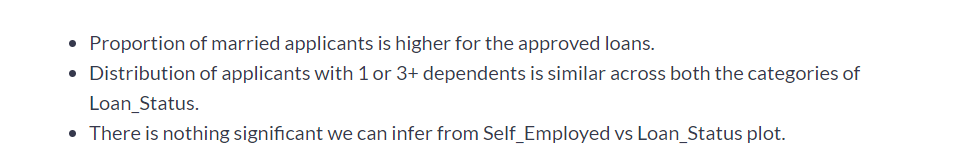

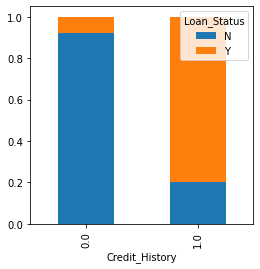

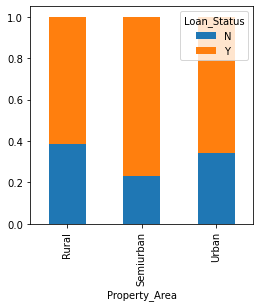

In [14]:
Credit_History = pd.crosstab(df['Credit_History'], df['Loan_Status'])
Property_Area = pd.crosstab(df['Property_Area'], df['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar", stacked="True", figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar", stacked="True", figsize=(4,4))
plt.show()

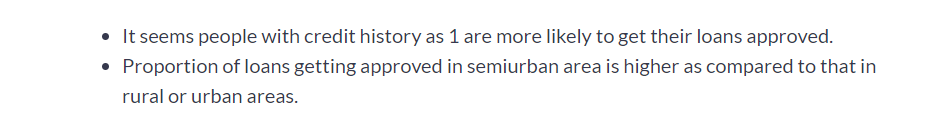

<AxesSubplot:xlabel='Loan_Status'>

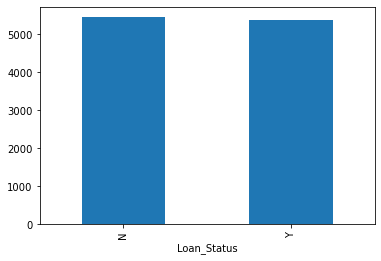

In [15]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

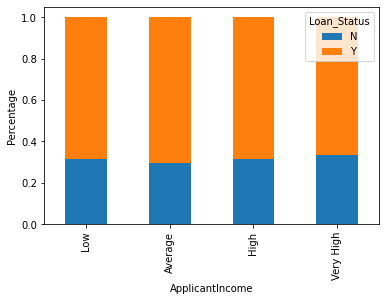

In [16]:
bins= [0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
df['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin = pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked="True",)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

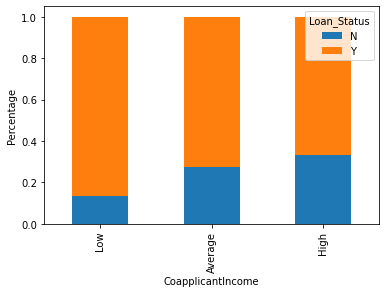

In [17]:
bins= [0,1000,3000,42000]
group=['Low','Average','High']
df['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin = pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked="True",)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.show()

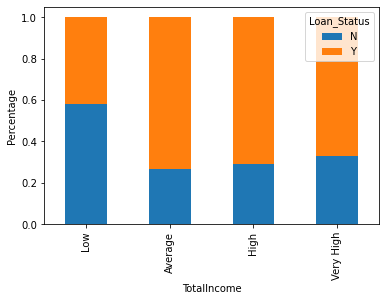

In [18]:
df['total_Income']= df['ApplicantIncome'] + df['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
df['Total_Income_bin'] = pd.cut(df['total_Income'],bins,labels=group)

Total_Income_bin = pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked="True",)
plt.xlabel('TotalIncome')
plt.ylabel('Percentage')
plt.show()

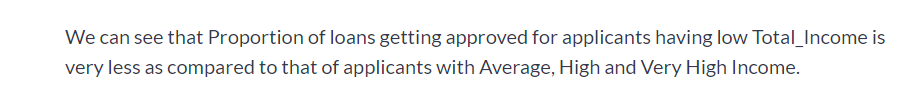

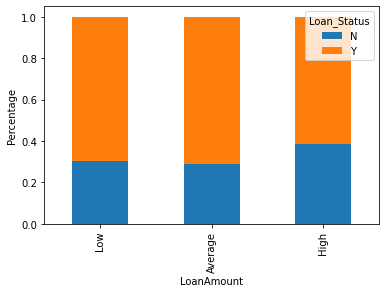

In [19]:
bins=[0,100,200,700]
group=['Low','Average','High']
df['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

LoanAmount_bin =pd.crosstab(df['LoanAmount_bin'],df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar", stacked="True",)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

In [20]:
df['Dependents'].replace('3+', 3,inplace=True)
df_test['Dependents'].replace('3+', 3,inplace=True)

df['Loan_Status'].replace('N', 0,inplace=True)
df['Loan_Status'].replace('Y', 1,inplace=True)


<AxesSubplot:>

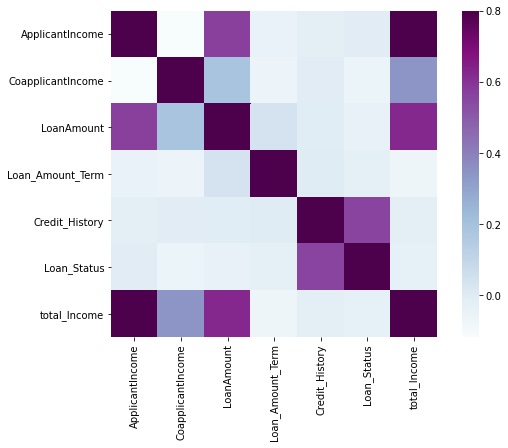

In [21]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

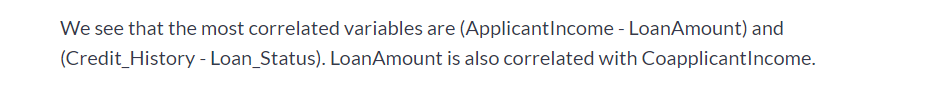

## Missing Values

In [22]:
df.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 15
Education                   0
Self_Employed              32
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
Income_bin                  0
Coapplicant_Income_bin    273
total_Income                0
Total_Income_bin            0
LoanAmount_bin             22
dtype: int64

In [25]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [26]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [27]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

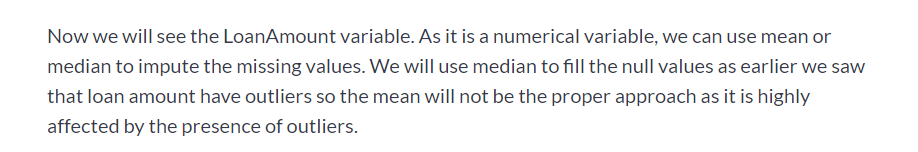

In [30]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [32]:
df.drop(['Income_bin','Coapplicant_Income_bin','total_Income','Total_Income_bin','LoanAmount_bin'], axis=1, inplace=True)

In [33]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [34]:
df_test['Gender'].fillna(df_test['Gender'].mode()[0],inplace=True)
df_test['Married'].fillna(df_test['Married'].mode()[0],inplace=True)
df_test['Dependents'].fillna(df_test['Dependents'].mode()[0],inplace=True)
df_test['Self_Employed'].fillna(df_test['Self_Employed'].mode()[0],inplace=True)
df_test['Credit_History'].fillna(df_test['Credit_History'].mode()[0],inplace=True)

In [35]:
df_test['LoanAmount'].fillna(df_test['LoanAmount'].median(),inplace=True)
df_test['Loan_Amount_Term'].fillna(df_test['Loan_Amount_Term'].mode()[0],inplace=True)

## Outliers

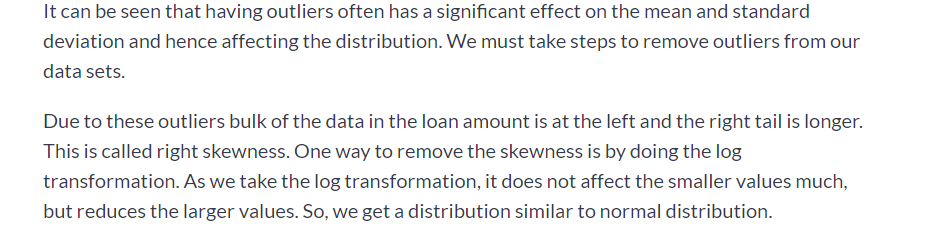

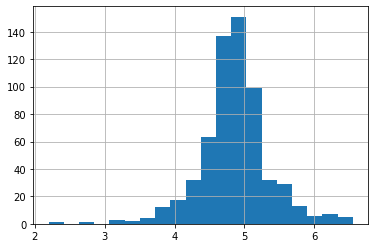

In [36]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
df_test['LoanAmount_log'] = np.log(df_test['LoanAmount'])

## Model

In [41]:
df = df.drop('Loan_ID',axis=1)
df_test = df_test.drop('Loan_ID',axis=1)

In [42]:
X = df.drop('Loan_Status',1)
y = df['Loan_Status'] 

In [43]:
X = pd.get_dummies(X)
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split (X,y, test_size=0.3)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='12', random_state=1, solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


LogisticRegression(multi_class='ovr', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

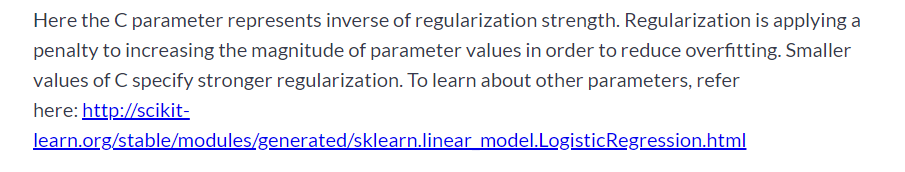

In [47]:
pred_cv = model.predict(x_cv)

In [48]:
accuracy_score(y_cv, pred_cv)

0.8216216216216217

In [49]:
pred_test = model.predict(df_test)

In [51]:
submission_file = pd.read_csv('sample_submission_49d68Cx.csv')
df_test_original = pd.read_csv('test_lAUu6dG.csv')

In [52]:
submission_file['Loan_Status'] = pred_test
submission_file['Loan_ID'] = df_test_original['Loan_ID']

In [54]:
submission_file['Loan_Status'].replace(0,'N',inplace=True)
submission_file['Loan_Status'].replace(1,'Y',inplace=True)

In [55]:
pd.DataFrame(submission_file, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')

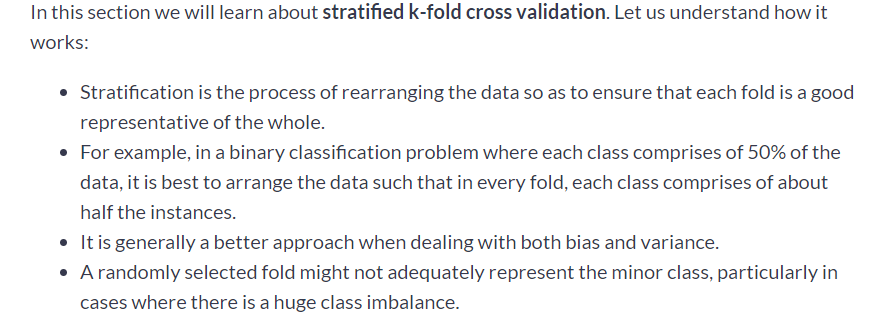

In [57]:
from sklearn.model_selection import StratifiedKFold

i=5
kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model.predict(df_test)
    pred = model.predict_proba(xvl)[:,1] 
    
    


5 of kfold 5
accuracy_score 0.8048780487804879

6 of kfold 5
accuracy_score 0.8373983739837398

7 of kfold 5
accuracy_score 0.7804878048780488

8 of kfold 5
accuracy_score 0.7886178861788617

9 of kfold 5
accuracy_score 0.7950819672131147


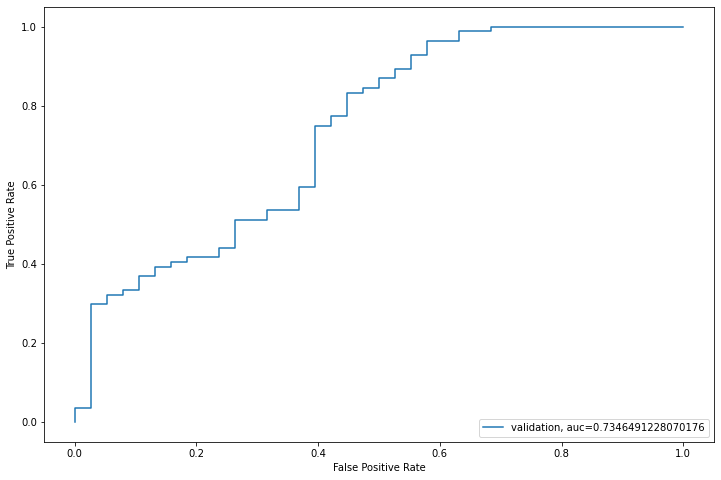

In [62]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=4)
plt.show()

In [63]:
submission_file['Loan_Status'] = pred_test
submission_file['Loan_ID'] = df_test_original['Loan_ID']

In [64]:
submission_file['Loan_Status'].replace(0,'N',inplace=True)
submission_file['Loan_Status'].replace(1,'Y',inplace=True)

In [65]:
pd.DataFrame(submission_file, columns=['Loan_ID','Loan_Status']).to_csv('Logistic_Kfold.csv')

## Feature Engineerng

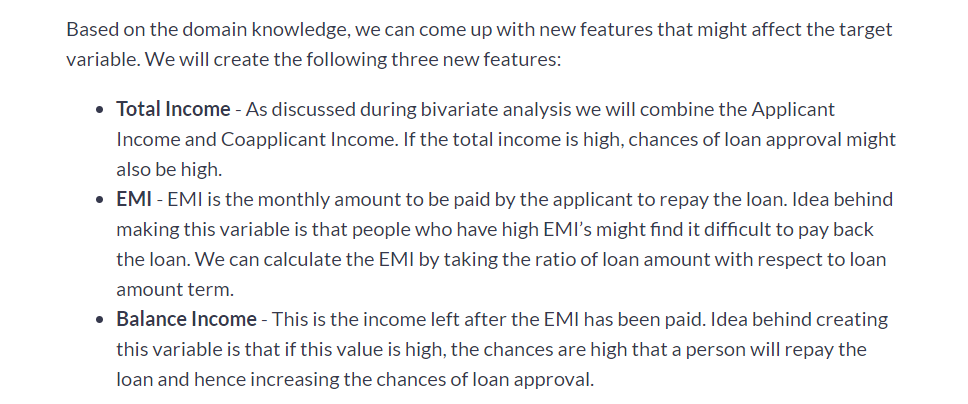

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

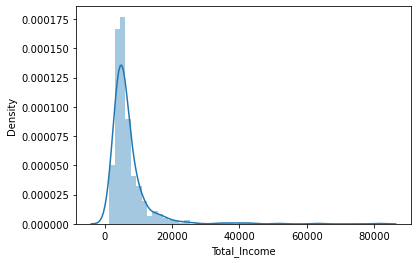

In [66]:
df['Total_Income'] =  df['ApplicantIncome'] + df['CoapplicantIncome']
df_test['Total_Income'] = df_test['ApplicantIncome'] + df_test['CoapplicantIncome']


sns.distplot(df['Total_Income'])

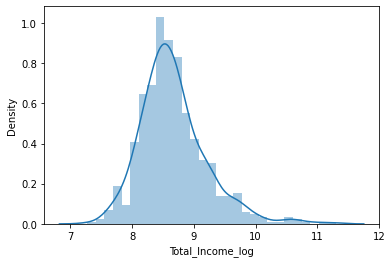

In [68]:
df['Total_Income_log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_log'])
df_test['Total_Income_log'] = np.log(df_test['Total_Income'])

In [69]:
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
df_test['EMI'] = df_test['LoanAmount'] / df_test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

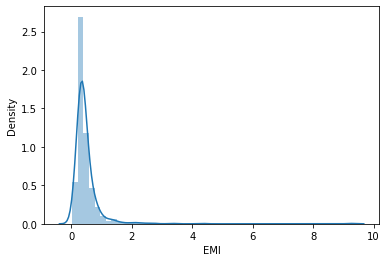

In [70]:
sns.distplot(df['EMI'])C

In [71]:
df['Balance Income'] = df['Total_Income'] - (df['EMI'] * 1000)               # multiply by 1000 to make the units equal
df_test['Balance Income'] = df_test['Total_Income'] - (df_test['EMI'] * 1000)

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

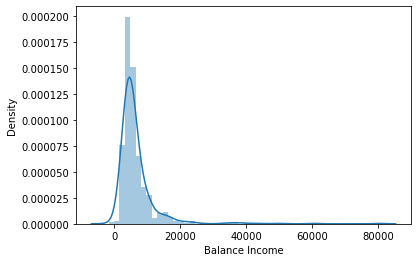

In [72]:
sns.distplot(df['Balance Income'])

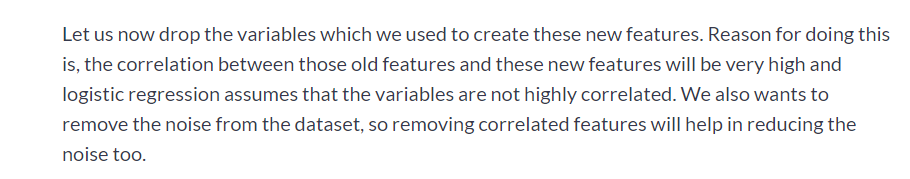

In [73]:
df = df.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
df_test = df_test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [74]:
X = df.drop('Loan_Status',1)
y = df.Loan_Status

In [75]:
# lOgistic Regression
i=1
kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model.predict(df_test)
    pred = model.predict_proba(xvl)[:,1] 



1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.6910569105691057

3 of kfold 5
accuracy_score 0.6666666666666666

4 of kfold 5
accuracy_score 0.7804878048780488

5 of kfold 5
accuracy_score 0.680327868852459


In [78]:
# Decision Tree
from sklearn import tree

i = 1
kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model.predict(df_test)
     


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


In [79]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

i = 1
kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model.predict(df_test)



1 of kfold 5
accuracy_score 0.8292682926829268

2 of kfold 5
accuracy_score 0.8130081300813008

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7540983606557377


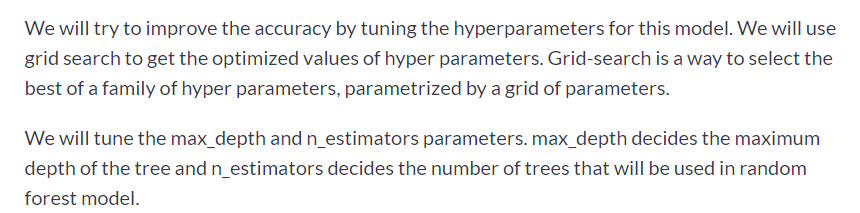

In [85]:
from sklearn.model_selection import GridSearchCV

# provide range for max_depth from 1 to 20 with an interval of 2 and from 1 to 200 with an interval of 20 for n_estimators

paramgrid = {'max_depth':list(range(1, 20, 2)), 'n_estimators':list(range(1, 200, 20))}

grid_search = GridSearchCV(RandomForestClassifier(random_state=1), paramgrid)


from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split (X,y, test_size=0.3, random_state=1)

# fit grid search model

grid_search.fit(x_train,y_train)

GridSearchCV(cv=None, error_score='raise', estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False), n_jobs=1, param_grid={'max_depth':[1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators':[1, 21, 41, 61, 81, 101, 121, 141, 161, 181]}, pre_dispatch='2*n_jobs',refit=True, return_train_score='warn', scoring=None, verbose=0)

#Estimate the optimized value
grid_search.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=3, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1, oob_score=False, random_state=1, verbose=0, warm_start=False)


RandomForestClassifier(max_depth=3, n_estimators=41, n_jobs=1, random_state=1)

In [86]:
i = 1
kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model.predict(df_test)
    pred2=model.predict_proba(df_test)[:,1]


1 of kfold 5
accuracy_score 0.8130081300813008

2 of kfold 5
accuracy_score 0.8455284552845529

3 of kfold 5
accuracy_score 0.8048780487804879

4 of kfold 5
accuracy_score 0.7967479674796748

5 of kfold 5
accuracy_score 0.7786885245901639


In [87]:
submission_file['Loan_Status'] = pred_test
submission_file['Loan_ID'] = df_test_original['Loan_ID']

submission_file['Loan_Status'].replace(0,'N',inplace=True)
submission_file['Loan_Status'].replace(1,'Y',inplace=True)

pd.DataFrame(submission_file, columns=['Loan_ID','Loan_Status']).to_csv('Random_Forest.csv')

<AxesSubplot:>

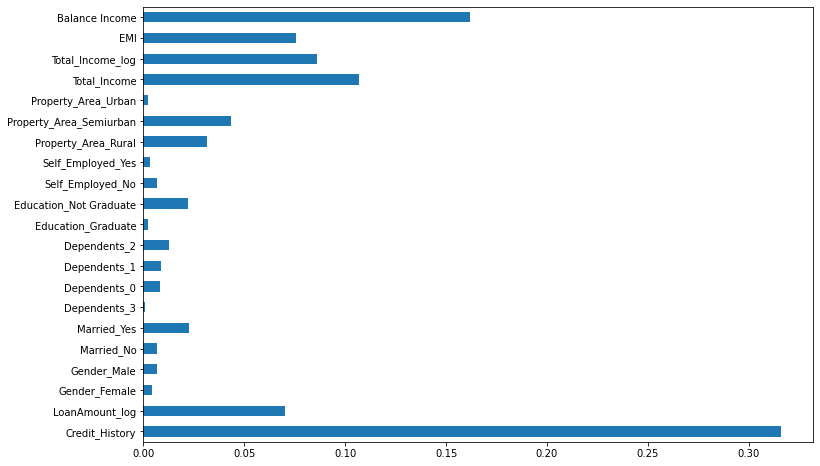

In [90]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

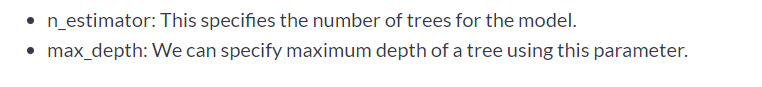

In [92]:
# XGBoost

from xgboost import XGBClassifier

i = 1
kf= StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(max_depth=4, n_estimators=50)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i+=1
    pred_test = model.predict(df_test)
    pred3=model.predict_proba(df_test)[:,1]



1 of kfold 5
[12:23:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7804878048780488

2 of kfold 5
[12:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_score 0.7886178861788617

3 of kfold 5
[12:23:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if 

In [93]:
submission_file['Loan_Status'] = pred_test
submission_file['Loan_ID'] = df_test_original['Loan_ID']

submission_file['Loan_Status'].replace(0,'N',inplace=True)
submission_file['Loan_Status'].replace(1,'Y',inplace=True)

pd.DataFrame(submission_file, columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv')